In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df = pd.read_csv("A:\\Aniket_Scidentai\\MLOPS\\predict_calorie_expenditure\\data\\raw\\Predict_Calorie_Expenditure.csv")

In [74]:
df.drop(columns={"id"}, inplace=True)

In [76]:
df.shape

(750000, 8)

In [77]:
df['Body_Temp'] = np.log(0.675 * (df['Body_Temp'].max() + 1 - 0.675*(df['Body_Temp'])))
df['Age'] = np.log(df['Age'] * 0.25 + 1)

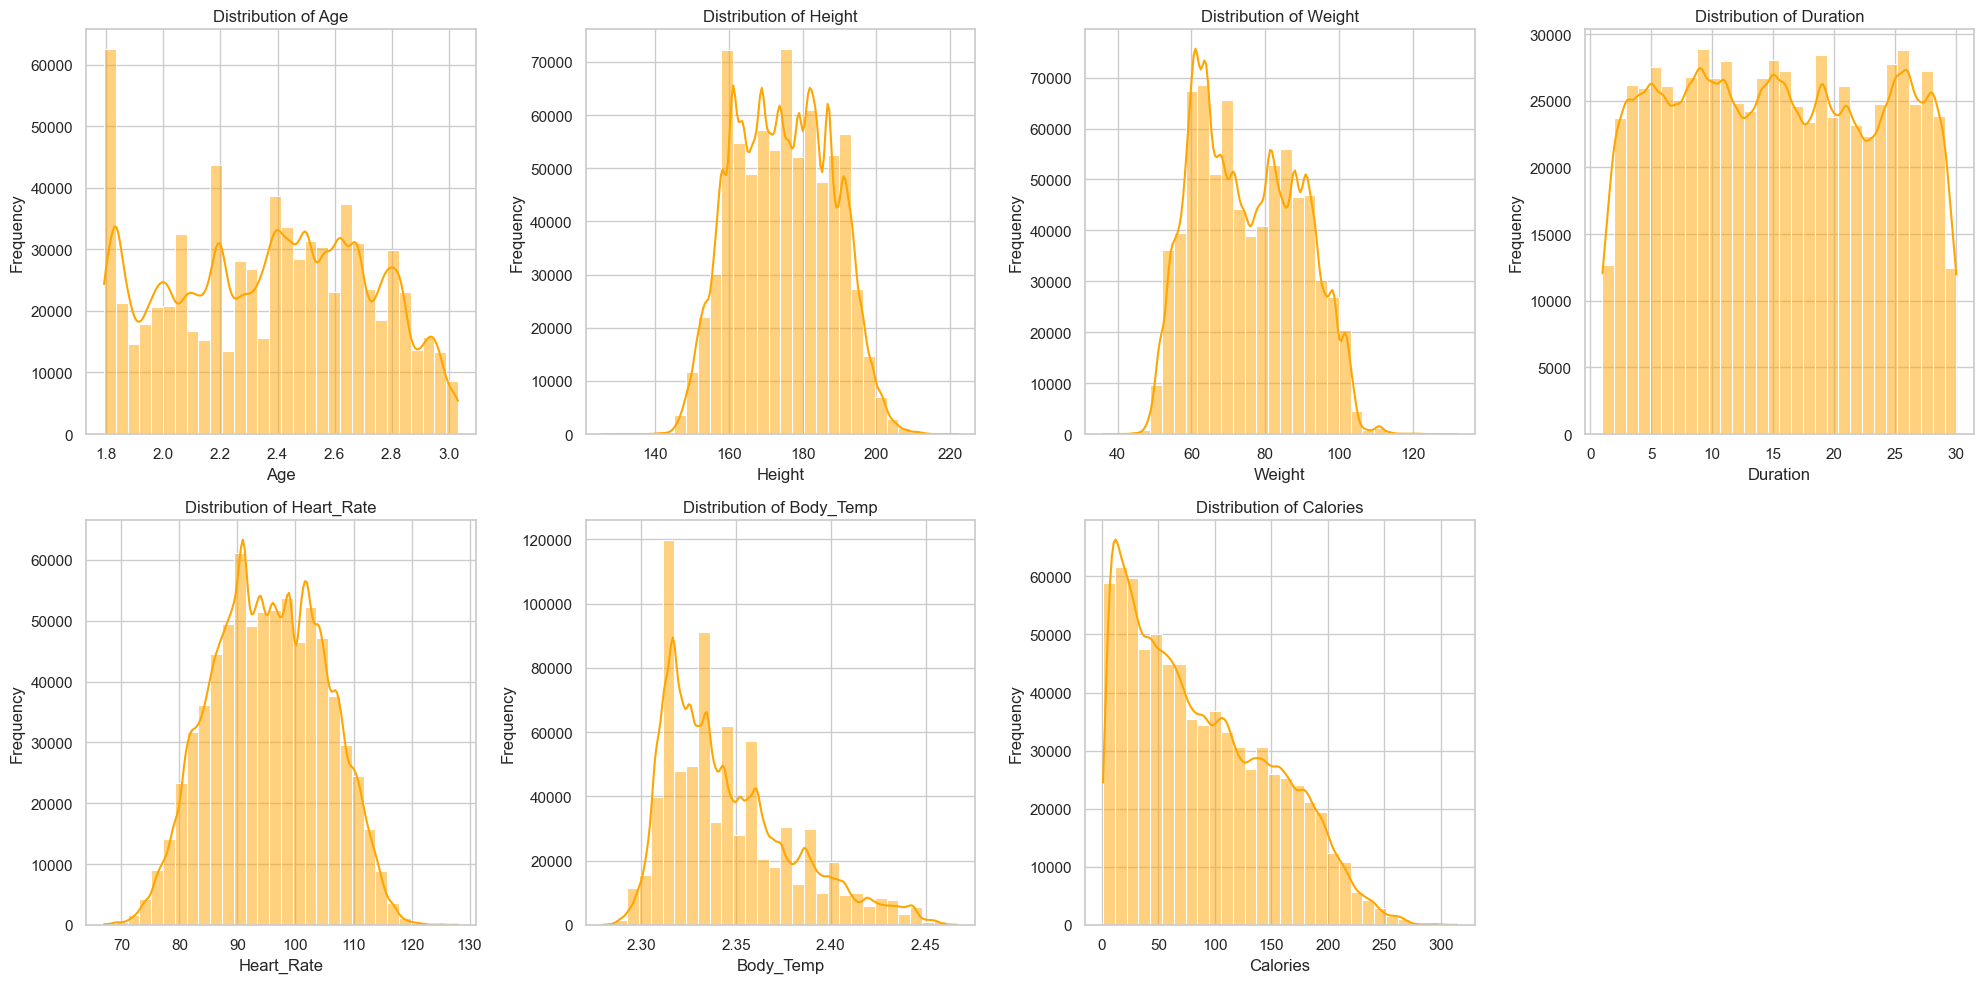

In [80]:
# Plot settings
sns.set_style(style="whitegrid")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_per_row = 4
rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot histograms
for idx, col in enumerate(numeric_cols):
    sns.histplot(x=df[col], kde=True, bins=30, color='orange', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [79]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,2.302585,189.0,82.0,26.0,101.0,2.303272,150.0
1,female,2.833213,163.0,60.0,8.0,85.0,2.360777,34.0
2,female,2.621039,161.0,64.0,7.0,84.0,2.356469,29.0
3,male,1.791759,192.0,90.0,25.0,105.0,2.316839,140.0
4,female,2.351375,166.0,61.0,25.0,102.0,2.321321,146.0
